In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('Tin_data.csv') 

X = data.drop(columns=['Bandgap'])
y = data['Bandgap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Epoch 1/100


C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 2.2522 - mae: 1.4262 - val_loss: 1.3863 - val_mae: 1.1294
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3303 - mae: 1.0587 - val_loss: 0.6641 - val_mae: 0.7623
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8216 - mae: 0.8188 - val_loss: 0.2246 - val_mae: 0.3944
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4969 - mae: 0.5998 - val_loss: 0.1080 - val_mae: 0.2910
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2889 - mae: 0.4225 - val_loss: 0.2255 - val_mae: 0.2919
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2910 - mae: 0.4057 - val_loss: 0.4034 - val_mae: 0.4939
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2650 - mae: 0.3811 - val_loss: 0.4355 - val_mae: 0.5397
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2033 - mae: 0.3300 - val_loss: 0.3624 - val_mae: 0.4938
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1346 - mae: 0.2966 - va

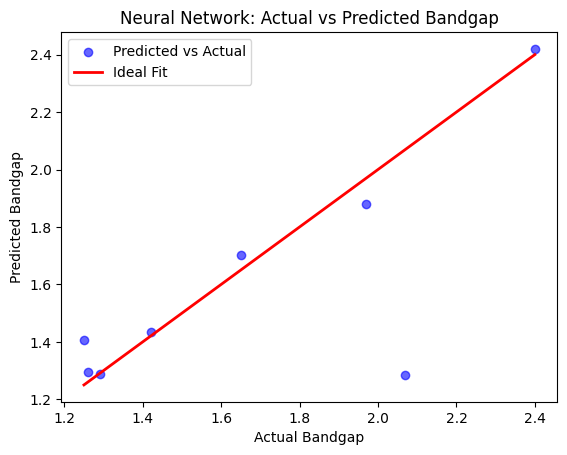

In [4]:
import matplotlib.pyplot as plt

# Flatten predictions if necessary (though they are likely already in the correct shape)
y_pred_nn = predictions.flatten()

plt.scatter(y_test, y_pred_nn, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Neural Network: Actual vs Predicted Bandgap')
plt.legend()
plt.show()